In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset 
df = pd.read_csv('C:/Users/ASUS/Desktop/maids/train.csv')
# Inspect the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [19]:
# Remove rows with any NaN values
df_cleaned = df.dropna()
print(df_cleaned.info())
print(df_cleaned.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   float64
 5   four_g         1991 non-null   float64
 6   int_memory     1991 non-null   float64
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   float64
 9   n_cores        1991 non-null   float64
 10  pc             1991 non-null   float64
 11  px_height      1991 non-null   float64
 12  px_width       1991 non-null   float64
 13  ram            1991 non-null   float64
 14  sc_h           1991 non-null   float64
 15  sc_w           1991 non-null   float64
 16  talk_time      1991 non-null   int64  
 17  three_g        1991 non-null   int64  
 18  touch_screen 

In [20]:

# Feature scaling
features = df_cleaned.drop(columns=['price_range'])
target = df_cleaned['price_range']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)


C:\Users\ASUS\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


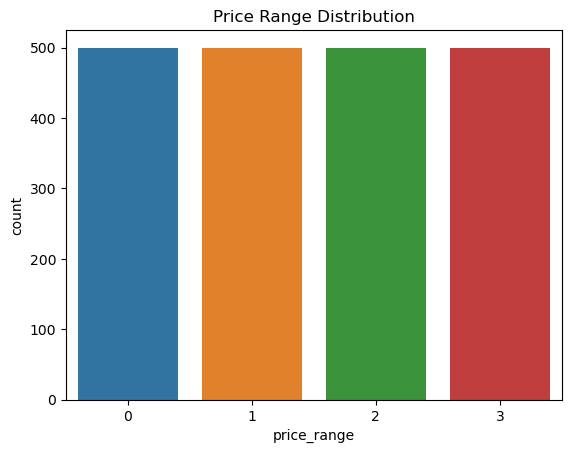

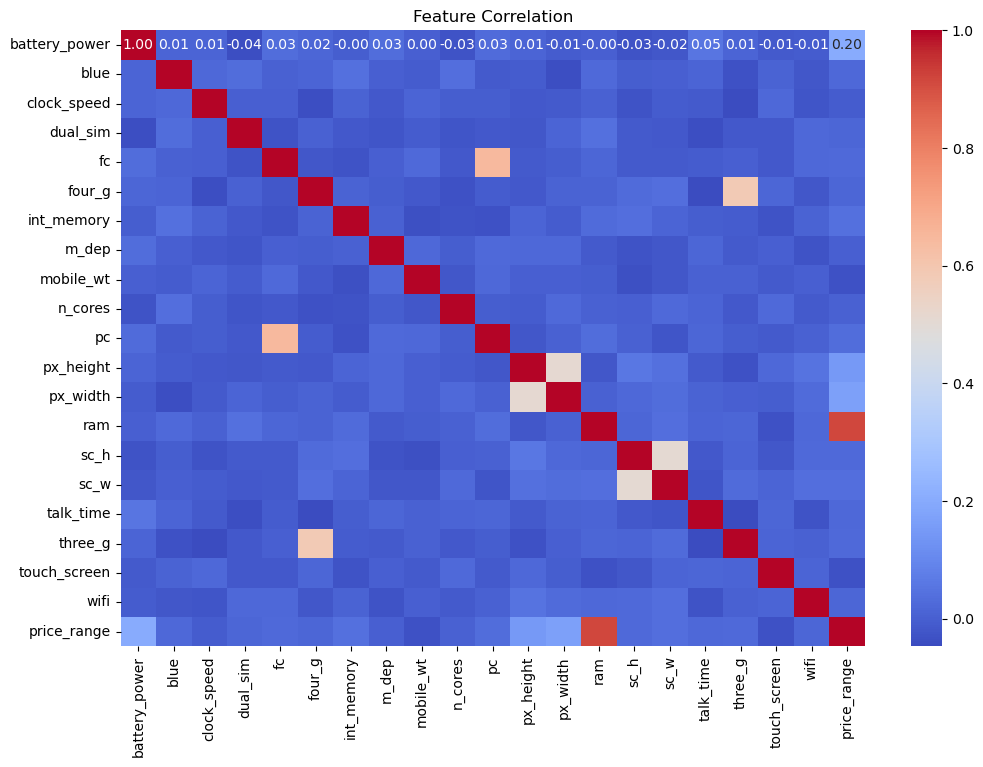

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of price_range
sns.countplot(x='price_range', data=df)
plt.title('Price Range Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[98  8  0  0]
 [ 9 76  4  0]
 [ 0 15 86  6]
 [ 0  0  4 93]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.77      0.85      0.81        89
           2       0.91      0.80      0.86       107
           3       0.94      0.96      0.95        97

    accuracy                           0.88       399
   macro avg       0.88      0.89      0.88       399
weighted avg       0.89      0.88      0.88       399



In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(kernel='linear', C=1.0, random_state=42)  # You can try other kernels like 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[105   1   0   0]
 [  2  85   2   0]
 [  0   3 102   2]
 [  0   0   1  96]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       106
           1       0.96      0.96      0.96        89
           2       0.97      0.95      0.96       107
           3       0.98      0.99      0.98        97

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399



In [31]:
# RBF Kernel
model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)
print("RBF Kernel Results")
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

# Polynomial Kernel
model_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)
print("Polynomial Kernel Results")
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))

# Sigmoid Kernel
model_sigmoid = SVC(kernel='sigmoid', C=1.0, gamma='scale', random_state=42)
model_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = model_sigmoid.predict(X_test)
print("Sigmoid Kernel Results")
print(confusion_matrix(y_test, y_pred_sigmoid))
print(classification_report(y_test, y_pred_sigmoid))

# linear Kernel
model_linear = SVC(kernel='linear', C=1.0, random_state=42)  
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
print("linear Kernel Results")
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

RBF Kernel Results
[[96 10  0  0]
 [ 7 74  8  0]
 [ 0  9 89  9]
 [ 0  0 10 87]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       106
           1       0.80      0.83      0.81        89
           2       0.83      0.83      0.83       107
           3       0.91      0.90      0.90        97

    accuracy                           0.87       399
   macro avg       0.87      0.87      0.87       399
weighted avg       0.87      0.87      0.87       399

Polynomial Kernel Results
[[88 18  0  0]
 [15 60 14  0]
 [ 0 19 79  9]
 [ 0  0 24 73]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       106
           1       0.62      0.67      0.65        89
           2       0.68      0.74      0.71       107
           3       0.89      0.75      0.82        97

    accuracy                           0.75       399
   macro avg       0.76      0.75      0.75       399
weighted avg      

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100   6   0   0]
 [  4  82   3   0]
 [  0   8  93   6]
 [  0   0   3  94]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       106
           1       0.85      0.92      0.89        89
           2       0.94      0.87      0.90       107
           3       0.94      0.97      0.95        97

    accuracy                           0.92       399
   macro avg       0.92      0.93      0.92       399
weighted avg       0.93      0.92      0.92       399



In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

# Load the model and scaler
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

app = FastAPI()

# Define the request body structure
class DeviceFeatures(BaseModel):
    battery_power: float
    blue: bool
    clock_speed: float
    dual_sim: bool
    fc: float
    four_g: bool
    int_memory: float
    m_dep: float
    mobile_wt: float
    n_cores: float
    pc: float
    px_height: float
    px_width: float
    ram: float
    sc_h: float
    sc_w: float
    talk_time: float
    three_g: bool
    touch_screen: bool
    wifi: bool

@app.post("/predict")
def predict_price(device: DeviceFeatures):
    # Extract data in correct order
    data = [[
        device.battery_power,
        int(device.blue),  # Convert boolean to int
        device.clock_speed,
        int(device.dual_sim),  # Convert boolean to int
        device.fc,
        int(device.four_g),  # Convert boolean to int
        device.int_memory,
        device.m_dep,
        device.mobile_wt,
        device.n_cores,
        device.pc,
        device.px_height,
        device.px_width,
        device.ram,
        device.sc_h,
        device.sc_w,
        device.talk_time,
        int(device.three_g),  # Convert boolean to int
        int(device.touch_screen),  # Convert boolean to int
        int(device.wifi)  # Convert boolean to int
    ]]
    
    # Scale the data
    scaled_data = scaler.transform(data)
    
    # Predict the price range
    prediction = model.predict(scaled_data)
    
    # Return the prediction
    return {"price_range": int(prediction[0])}

# To run the app:
# uvicorn app:app --reload
